

---

# Projecct Title -Exploratory Data Analysis  - Terrorism

In [10]:
import pandas as pd
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
%cd /content/drive/My Drive/CODERSCAVE

/content/drive/My Drive/CODERSCAVE


In [13]:
%ls

globalterrorism.csv


In [14]:
global_data =pd.read_csv("/content/drive/My Drive/CODERSCAVE/globalterrorism.csv",encoding='latin-1')

<ipython-input-14-39aa859b1a7d>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  global_data =pd.read_csv("/content/drive/My Drive/CODERSCAVE/globalterrorism.csv",encoding='latin-1')


In [15]:
global_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
column_list = global_data.columns.to_list()
print(column_list)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [17]:
global_data.rename(columns={'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                        'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [18]:
# I'm just take important data in whole dataset those I'm using further processing.
global_data = global_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','success','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [19]:
global_data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,success,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [20]:
global_data.shape

(181691, 19)

In [21]:
pip install tabulate


In [22]:


missing_values = global_data.isnull().sum().reset_index()

# Pretty print missing values and info() summary
print("\nMissing Values:")
print(tabulate(missing_values, headers='keys', tablefmt='pretty', showindex=False))





Missing Values:
+-------------+--------+
|    index    |   0    |
+-------------+--------+
|    Year     |   0    |
|    Month    |   0    |
|     Day     |   0    |
|   Country   |   0    |
|    state    |  421   |
|   Region    |   0    |
|    city     |  434   |
|  latitude   |  4556  |
|  longitude  |  4557  |
|   success   |   0    |
| AttackType  |   0    |
|   Killed    | 10313  |
|   Wounded   | 16311  |
|   Target    |  636   |
|   Summary   | 66129  |
|    Group    |   0    |
| Target_type |   0    |
| Weapon_type |   0    |
|   Motive    | 131130 |
+-------------+--------+


In [23]:
import pandas as pd

# Find the least values


highest_country = global_data['Country'].value_counts().idxmin()
highest_city = global_data['city'].value_counts().index[1]
highest_region = global_data['Region'].value_counts().idxmin()
highest_year = global_data['Year'].value_counts().idxmin()
highest_month = global_data['Month'].value_counts().idxmin()
highest_group = global_data['Group'].value_counts().index[1]
highest_attack_type = global_data['AttackType'].value_counts().idxmin()

least_country = global_data['Country'].value_counts().idxmin()
least_city = global_data['city'].value_counts().index[-1]  # Get the last entry
least_region = global_data['Region'].value_counts().idxmin()
least_year = global_data['Year'].value_counts().idxmin()
least_month = global_data['Month'].value_counts().idxmin()
least_group = global_data['Group'].value_counts().index[-1]  # Get the last entry
least_attack_type = global_data['AttackType'].value_counts().idxmin()

# Create a DataFrame for the least values
least_values = pd.DataFrame({
    'Category': ['Country', 'City', 'Region', 'Year', 'Month', 'Group', 'Attack Type'],
    'Least': [least_country, least_city, least_region, least_year, least_month, least_group, least_attack_type],
    'Highest' : [highest_country, highest_city, highest_region, highest_year, highest_month, highest_group, highest_attack_type]
})



In [24]:
# Style the DataFrame with a simple format
styled_least_values = least_values.style

# Display the styled DataFrame
styled_least_values

,Category,Least,Highest
0,Country,Vatican City,Vatican City
1,City,Kubentog,Baghdad
2,Region,Australasia & Oceania,Australasia & Oceania
3,Year,1971,1971
4,Month,0,0
5,Group,MANO-D,Taliban
6,Attack Type,Hijacking,Hijacking


## EDA

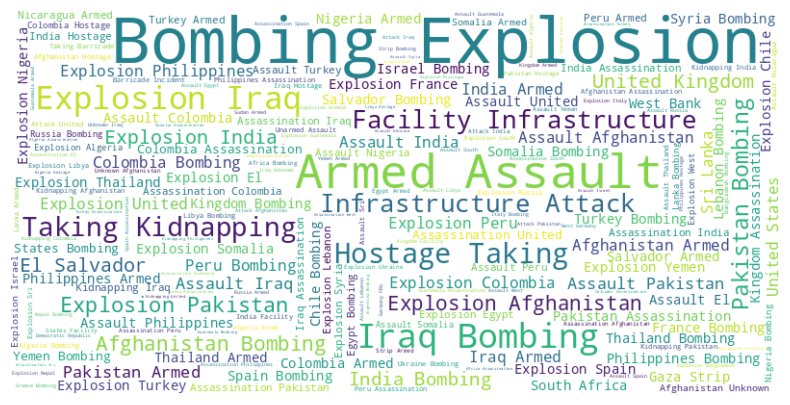

In [25]:
text = ' '.join(global_data[['Country', 'AttackType']].astype(str).agg(' '.join, axis=1))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Interpretation
* >The word cloud analysis of the terrorism dataset reveals fascinating insights into the prevalence of various attack types across different countries. Among the nations included in the dataset, it is evident that bombings and explosions are the most common attack type, represented by their larger presence in the word cloud. Notably, the Afghanisthan, Pakistan, and Iraq appear to have experienced a substantial number of bombings and Explosion.
>Meanwhile, other countries like

*   >Russia, India, and Syria exhibit a diverse range of attack types, including armed assaults, hostage takings, and kidnappings.
* >This analysis underscores the global diversity of terrorist activities, highlighting the need for region-specific counterterrorism strategies.

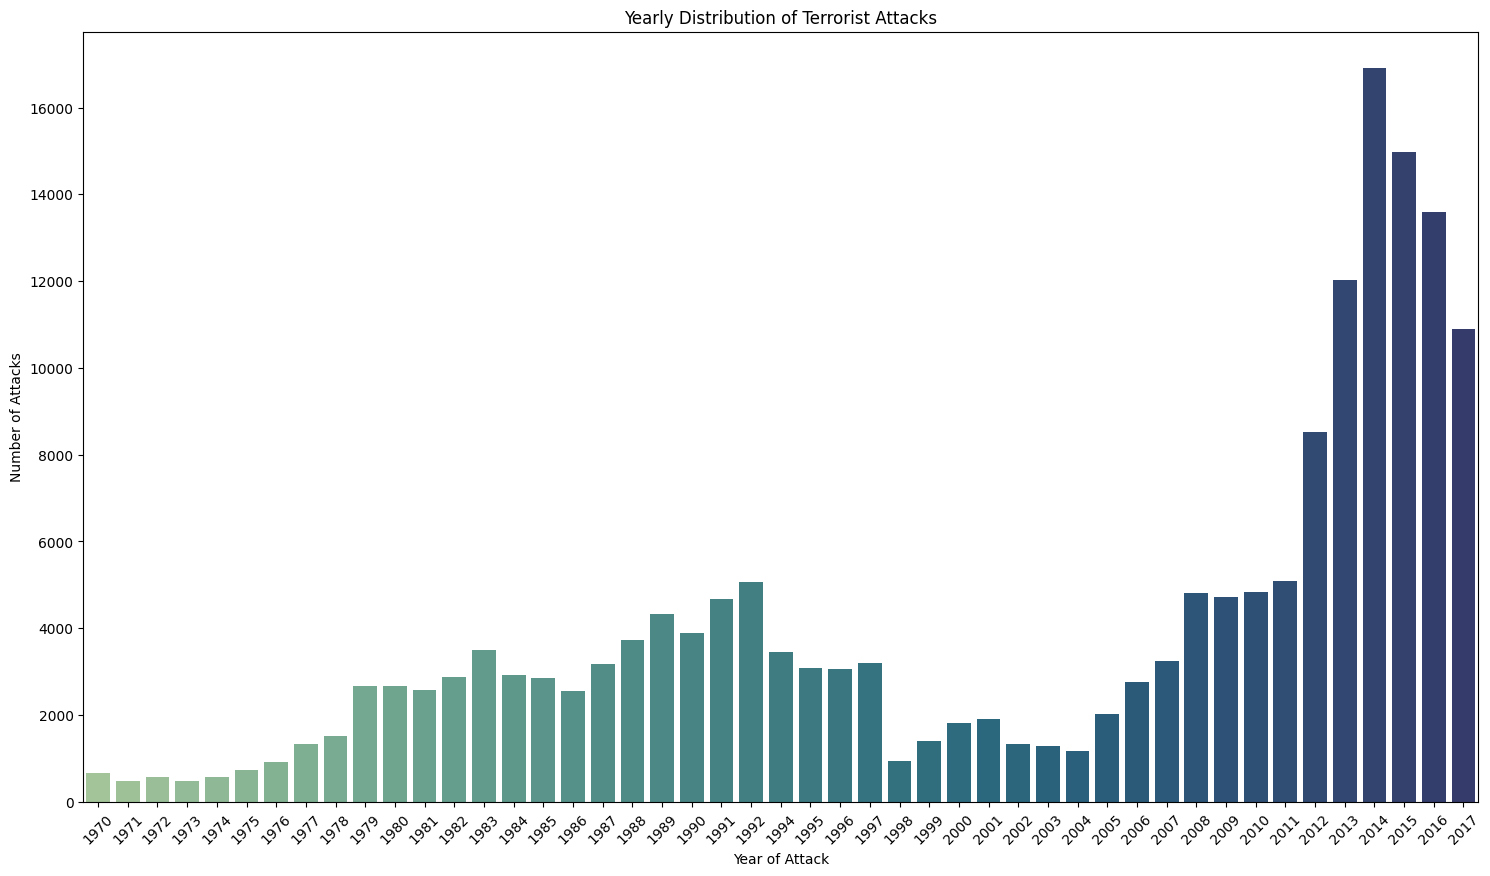

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

years_xAxis = global_data['Year'].unique()
attack_counts_yAixs = global_data['Year'].value_counts(dropna=False).sort_index()

plt.figure(figsize=(18, 10))
sns.barplot(x=years_xAxis, y=attack_counts_yAixs, palette='crest')
plt.xticks(rotation=45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks')
plt.title('Yearly Distribution of Terrorist Attacks')
plt.show()


## Interpretation
* > It is essential to note the regional variation within the graph. Some regions, such as the Middle East and South Asia, consistently experience a high number of attacks, while others, like Europe and North America, exhibit more sporadic incidents.
* > Rise in Terrorism: From the early 1970s to the late 1980s, there is a discernible increase in the number of attacks. The highest was recorded on 2014 and the least attacks observed in 1973.


---



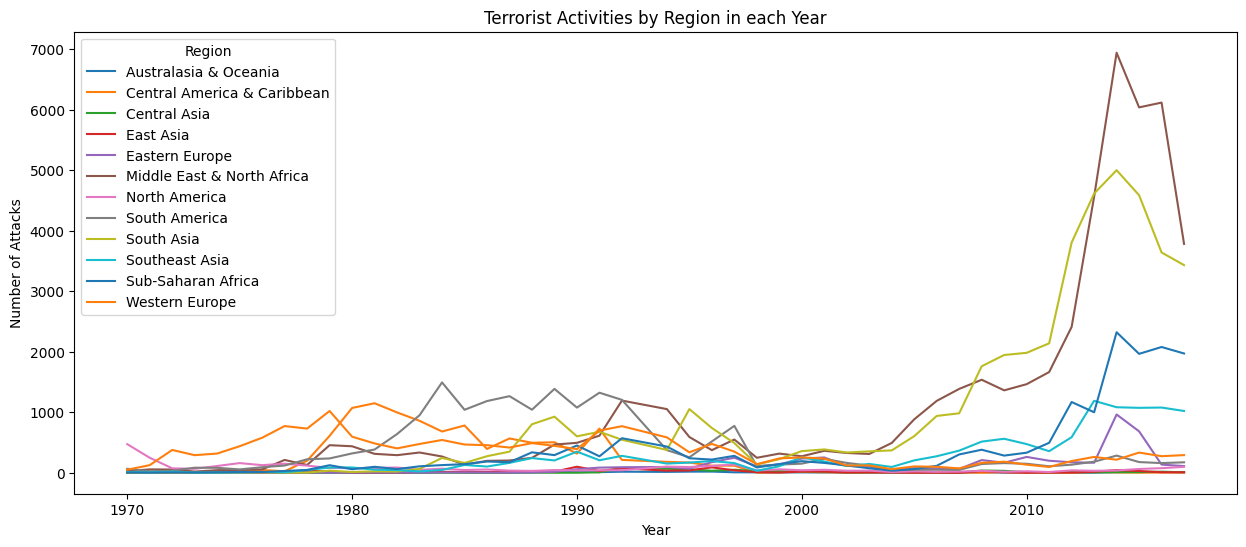

In [27]:
pd.crosstab(global_data.Year, global_data.Region).plot(kind='line',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()



---
**Line Chart Interpretation:**

* The line chart illustrates the trends in terrorist incidents across different regions from 1970 to 2017. Notably, the Middle East & North Africa & South Asia exhibit a consistently high number of attacks, exemplified by a steep upward trend.

* In contrast, regions like Australasia & Oceania, Central Asia, and North America, South America maintain relatively low and stable levels of terrorism, reflecting different regional dynamics and security situations.

* Emphasizes the need for tailored counterterrorism strategies and international cooperation to address the diverse security challenges faced by different regions.This chart provides valuable insights for regional security analysis and policy considerations.


---



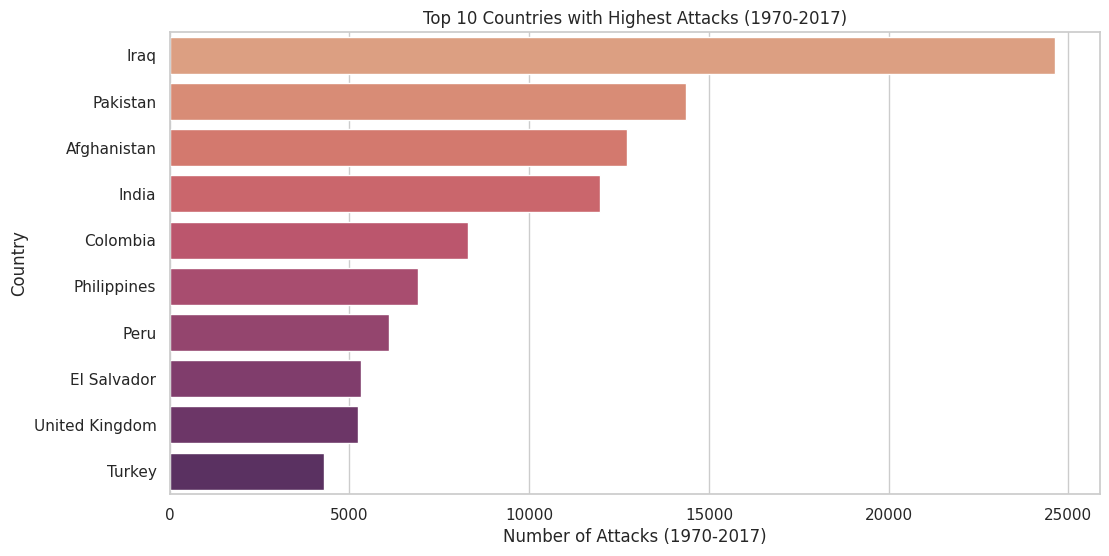

In [28]:
# Grouping 'Country' and to count number of attacks for each country
country_attacks = global_data['Country'].value_counts().reset_index()
country_attacks.columns = ['Country', 'Attack Count']

# top 10 countries with the highest attack count
top_10_countries = country_attacks.head(10)

# count plot for the top 10 countries along with number of attacks that occured
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Attack Count', y='Country', data=top_10_countries, palette="flare")
plt.xlabel('Number of Attacks (1970-2017)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Attacks (1970-2017)')
plt.show()


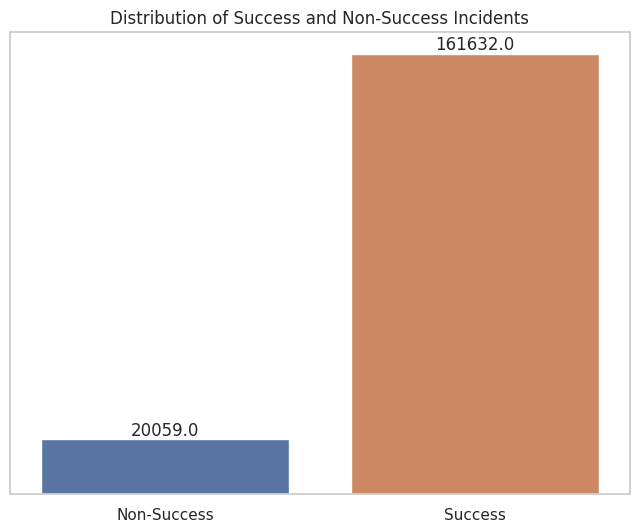

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=global_data, x="success")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')  # Set the y-axis label to an empty string
plt.title('Distribution of Success and Non-Success Incidents')
plt.xticks(ticks=[0, 1], labels=['Non-Success', 'Success'])

# Remove the y-axis ticks and labels
ax.set_yticks([])

plt.show()

### The data implies that the majority of the analyzed terrorist incidents were classified as successful. The significantly higher count of successful incidents (161,632) compared to failures (20,059) suggests a higher effectiveness rate in carrying out terrorist attacks.

In [30]:
global_data.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

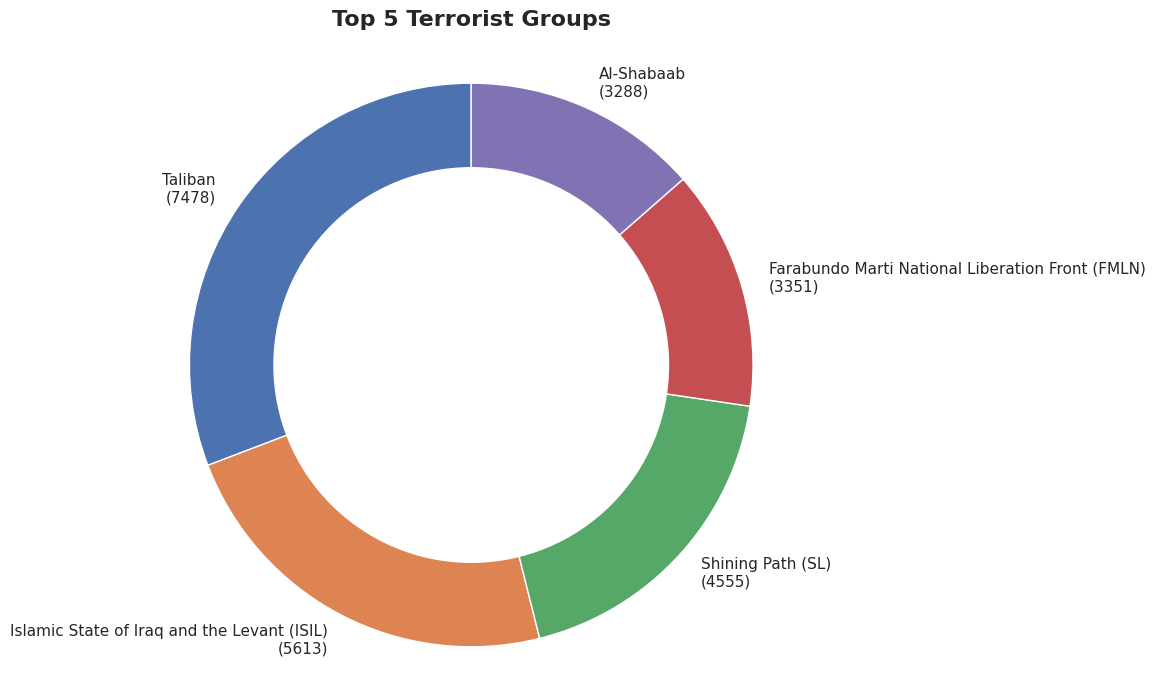

In [31]:

data = global_data[global_data['Group'] != 'Unknown']

# Counting the occurrences of each group
group_counts = data['Group'].value_counts()

# Selecting the top 7 groups
top_groups = group_counts.head(5)

# Creating a donut chart with counts
plt.figure(figsize=(8, 8))
plt.pie(top_groups, labels=[f"{group}\n({count})" for group, count in zip(top_groups.index, top_groups)],startangle=90)

plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))  # Adding a white circle in the center to create a donut chart
title = "Top 5 Terrorist Groups\n"
plt.title(title, fontsize=16, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()




---

## Interpretation

* When examining the top 5 terrorist groups, the chart displays their relative proportions based on the number of attacks they have carried out.

* The donut chart showcases the share of attacks attributed to each group. Taliban with 7478 attacks, occupies the largest portion of the donut, indicating its prominence in terms of offensive actions.ISIL, with 5613 attacks, follows closely behind. Group C, D, and E have progressively smaller slices of the donut, reflecting their comparatively lower number of attacks.

* Interpreting this chart can lead to several implications. First, it suggests that Taliban is the most active and potentially poses a significant threat due to the high number of attacks it has executed.

>By identifying the most active and influential terrorist groups, appropriate strategies can be developed to combat their activities effectively while taking into account the relative threat posed by other groups.

---



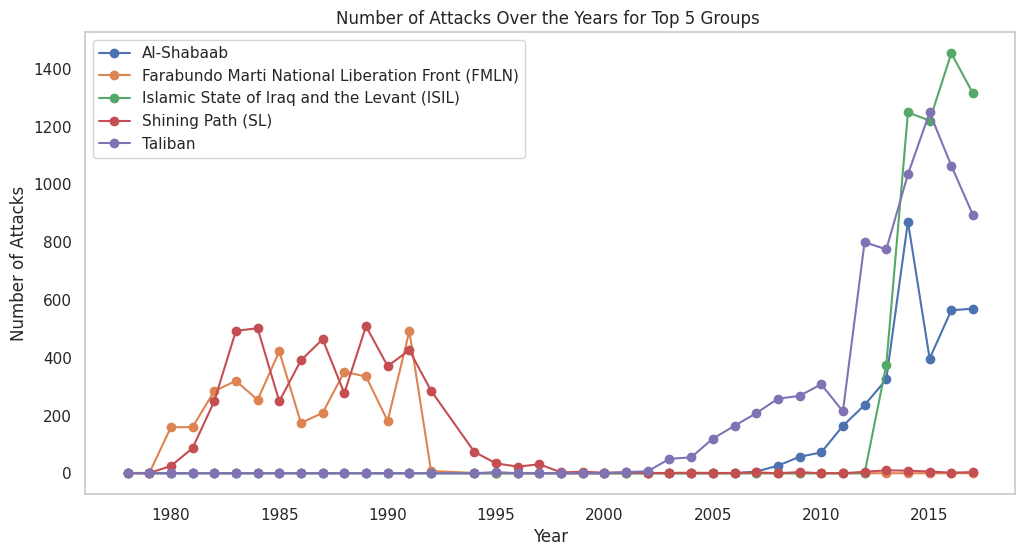

In [32]:


# Filter the dataset to include only the top 7 groups
top_groups_data = global_data[global_data['Group'].isin(top_groups.index)]

# Group the data by 'year' and 'Group' and count the number of attacks
group_year_counts = top_groups_data.groupby(['Year', 'Group']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for group in group_year_counts.columns:
    plt.plot(group_year_counts.index, group_year_counts[group], marker='o', linestyle='-', label=group)

plt.title('Number of Attacks Over the Years for Top 5 Groups ')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(loc='best')
plt.grid(False)

plt.show()


In [33]:


# Step 1: Filter the dataset to include only Taliban-related incidents
taliban_data = data[data['Group'] == 'Taliban']

targeted_regions = taliban_data['state'].value_counts()

targeted_regions_df = pd.DataFrame({'State': targeted_regions.index, 'Count': targeted_regions.values})

top_10 = targeted_regions_df.head(10)
print("DataFrame of Taliban's Targeted Regions:")
top_10_table = top_10.style.bar(subset=['Count'], color='#d65f5f')

print("Top 10 Taliban's Targeted Regions:")

top_10_table


DataFrame of Taliban's Targeted Regions:
Top 10 Taliban's Targeted Regions:


,State,Count
0,Helmand,795
1,Kandahar,621
2,Ghazni,515
3,Farah,379
4,Nangarhar,363
5,Faryab,362
6,Kabul,327
7,Kunduz,326
8,Herat,325
9,Uruzgan,302




---
## Interpretation

* It is evident that Helmand stands out as the region most targeted by the Taliban, with a significantly higher number of attacks (795) compared to the other regions. Kandahar follows closely behind with 621 attacks, indicating its vulnerability and strategic importance to the Taliban. Ghazni ranks third with 515 attacks, highlighting its significance as a target.

* Further down the list, Farah, Nangarhar, Faryab, and Kabul demonstrate relatively high numbers of attacks, ranging from 363 to 379. These regions also appear to be frequently targeted by the Taliban.

* Kunduz, Herat, and Uruzgan complete the top 10 list, each experiencing a substantial number of attacks (ranging from 302 to 326). While their frequencies are slightly lower than the regions above them, it is essential to recognize the persistent threat they face.


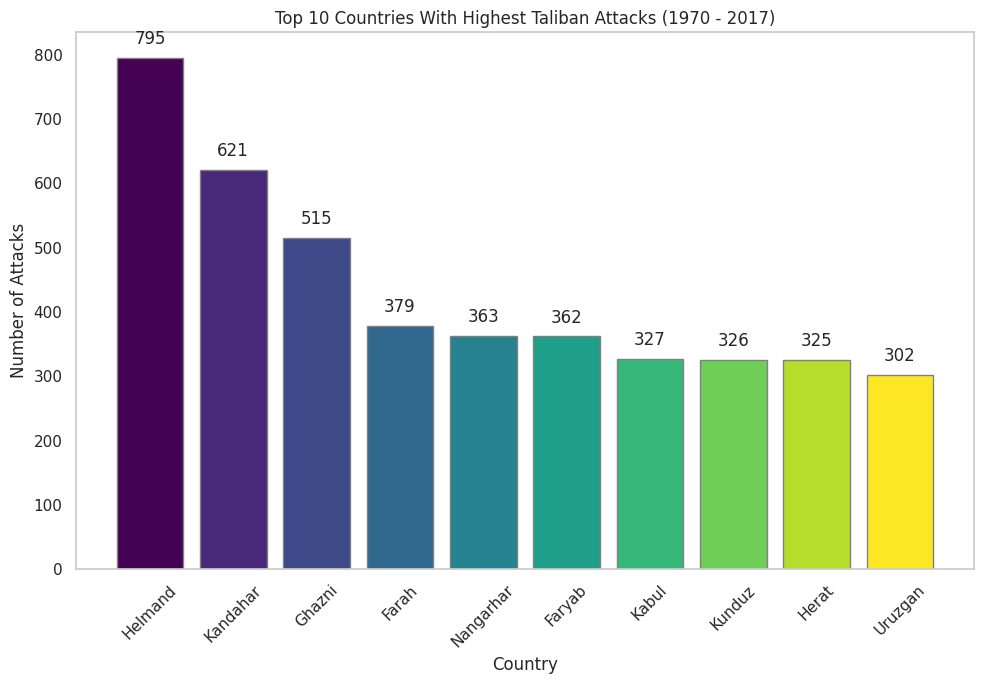

In [34]:
# Creating a color gradient using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10)))

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(top_10["State"], top_10["Count"], color=colors, edgecolor='gray', label='Count')

ax.set_xlabel("Country")
ax.set_ylabel("Number of Attacks")
ax.set_title("Top 10 Countries With Highest Taliban Attacks (1970 - 2017)")
ax.grid(False)

# Annotating each bar with its count value at the cente of each bar
for i, count in enumerate(top_10["Count"]):
    ax.annotate(count, (top_10["State"][i], count), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpretation
* Pakistan follows closely behind Afghanistan in terms of Taliban attacks, indicating the group's cross-border operations and the regional impact of their activities. India, the United States, and Nepal also feature prominently, signifying the Taliban's reach beyond Afghanistan's borders and their engagement in neighboring countries.

* Russia, the United Kingdom, Iraq, Saudi Arabia, and Bangladesh complete the top 10 list, each experiencing a significant number of Taliban attacks. These countries demonstrate the global reach of the Taliban and the diverse range of regions affected by their extremist activities.

* Analyzing the bar graph provides valuable insights into the countries most impacted by Taliban attacks over the studied period. It underscores the need for international collaboration and regional efforts to combat the Taliban's influence and work towards fostering peace and stability in these regions.

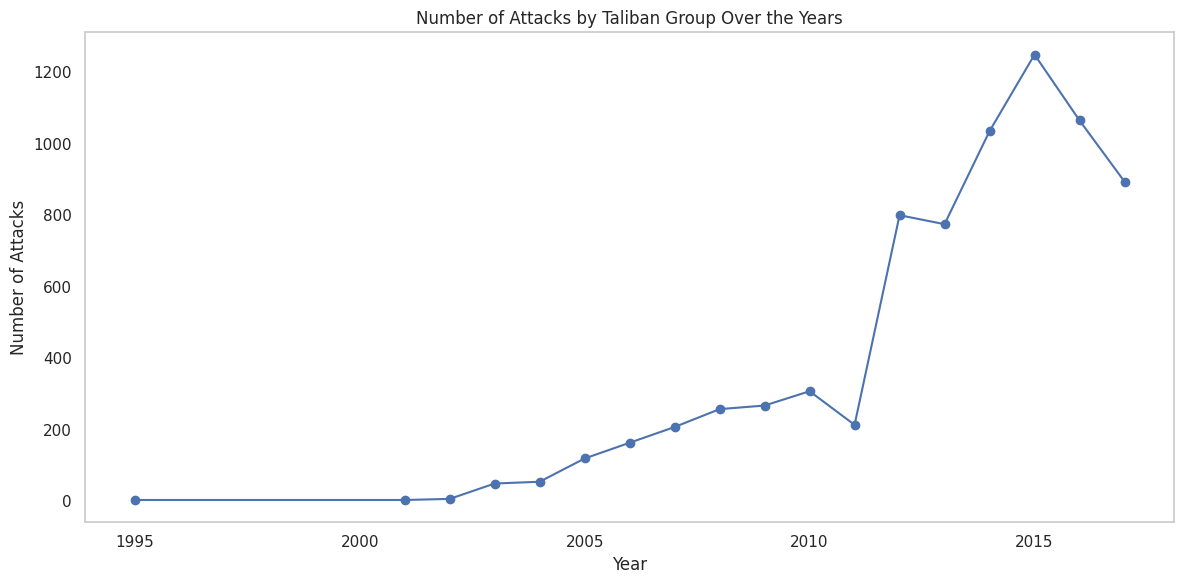

In [35]:
# Filter the dataset to include only the Taliban group
taliban_data = global_data[global_data['Group'] == 'Taliban']

# Group the data by year and count the number of attacks each year
attacks_by_year = taliban_data['Year'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(attacks_by_year.index, attacks_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Attacks by Taliban Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(False)
plt.tight_layout()

plt.show()

# Conclusion:

1. **Regional Targeting**: The EDA reveals that the Taliban has a significant regional impact, with Helmand, Kandahar, and Ghazni being the most targeted regions. This underscores the localized nature of their operations within Afghanistan.

2. **Vulnerable Regions**: Other regions like Farah, Nangarhar, Faryab, and Kabul are also highly vulnerable to Taliban attacks, emphasizing the widespread threat across the country.

3. **Global Reach**: The data shows that the Terrorist's activities extend beyond Afghanistan, with countries like Pakistan, India, the United States, and Nepal experiencing their attacks, indicating a cross-border presence.

4. **International Impact**: Russia, the United Kingdom, Iraq, Saudi Arabia, and Bangladesh feature in the top 10 list, demonstrating the global reach of the Taliban and the diverse regions affected by their extremist activities.


5. **Counterterrorism Focus**: Identifying the Taliban as the primary threat suggests the need for focused counterterrorism strategies to combat their activities effectively.

6. **Terrorism Effectiveness**: The data shows a higher number of successful terrorist incidents compared to failures, indicating a concerning level of effectiveness in carrying out attacks.

7. **Regional Trends**: The line chart underscores the persistent threat in the Middle East, North Africa, and South Asia, highlighting the need for region-specific counterterrorism efforts.

8. **Stable Regions**: On the other hand, regions like Australasia & Oceania, Central Asia, and North America, South America maintain low and stable levels of terrorism, suggesting different security dynamics.

9. **Diverse Attack Types**: The word cloud analysis reveals that bombings and explosions are prevalent, but there is a diverse range of attack types in different countries, emphasizing the need for tailored counterterrorism strategies.

